# Exploration

Import libraries 

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import weightedcalcs as wc

Import functions from source code

In [26]:
import sys
import os
sys.path.append('../src/features')
from build_features import filter_col_with_regex, fill_nulls, get_dummies

<i> Each observation is matched to a sampling frame constructed by the U.S. Census Bureau’s American Community Survey and weighted by a set of demographic and non-demographic variables<i> ( [Methodology](link ) )

In [35]:
with open('../data/processed/df.pickle', 'rb') as file:
    df = pickle.load(file)

Set up function for weighting observations

In [36]:
weight = df['weight']
calc = wc.Calculator('weight')

Calculate weighted distribution of responses to the following 2016 Post-Election survey question: <br><br>
     <b>Who did you vote for in the election for President?<b>

In [42]:
vote_freq_series = calc.distribution(df, 'presvote16post_2016').round(3)
candidates = ['Hillary Clinton', 'Donald Trump', 'Gary Johnson', 'Jill Stein','Evan McMullin', 'Other', 'Did not vote', 'No Response']
vote_freq_dict = dict(vote_freq_series)
print(vote_freq_dict)

{1.0: 0.406, 2.0: 0.399, 3.0: 0.027, 4.0: 0.012, 5.0: 0.002, 6.0: 0.016, 7.0: 0.008, 8.0: 0.13}


Set colors and labels to plot responses

In [41]:
clrs = ['cornflowerblue','tomato', 'gold','lightgreen','purple','lightgrey','dimgrey','darkgray']
cand_list = ['Clinton','Trump','Johnson','Stein','McMullin','Other','Did not vote', 'No Response',]

Plot responses to survey question

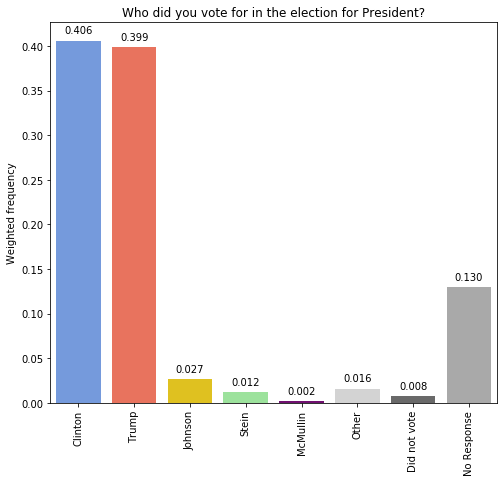

In [39]:
plt.figure(figsize=(8,7))
bar_plot = sns.barplot(x = cand_list, 
                       y = list(vote_freq_series), 
                       palette=clrs)
bar_plot.set_xticklabels(rotation=90, labels= cand_list)
bar_plot.set_title('Who did you vote for in the election for President?')
bar_plot.set_ylabel('Weighted frequency')
# add labels to bars
for bar in bar_plot.patches:
 bar_plot.annotate(format(bar.get_height(), '.3f'), 
                   (bar.get_x() + bar.get_width() / 2., 
                    bar.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
plt.show()

What features are correlated with this target?

In [ ]:
df_target_predictors.corr()['presvote16post_2016'].sort_values(ascending=False).head()

## Weighted issue prioritization of climate change

In [ ]:
climate_freq = calc.distribution(df_no_nulls, 'imiss_l_2016').round(3)
print('weighted frequency:', climate_freq)

In [ ]:
climate_list = []
for i in climate_freq:
    climate_list.append(i)
print(climate_list)
plt.figure(figsize=(8,8))
x = ['Very','Somewhat','Not very','Unimportant','No Response']
bplot = sns.barplot(x = x, y = climate_list, palette='Greens_d')
bplot.set_xticklabels(rotation=90, labels= x)
bplot.set_title('Survey Responses: How important of an issue is climate change?')
bplot.set_ylabel('Weighted Frequency')
for p in bplot.patches:
 bplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.show()

## Exploring relationship between community engagement and vote 

In [ ]:
# return list of community engagement column names
col_list = []
for i in range(1, 18):
    col = f'volunteerorg2_{i}_baseline'
    col_list.append(col)
    
# other community engagement fields 
comm_list = ['CIVIC_PARTICIPATION_2016',
             'pew_churatd_2016',
             'volunteer_baseline',
             'volunteerf_baseline',
             'volunteernum_baseline'
            ]

df_predictors = df[(col_list + comm_list)]

# save target subset of dataframe
df_target = pd.DataFrame(df['presvote16post_2016'])

# predictors and target
df_target_predictors = df_target.join(df_predictors)

### Climate change

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_l_2016').round(3)
print(res)

In [ ]:
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Climate change')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### The budget deficit

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_p_2016').round(3)
print(res)

In [ ]:
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: The Budget deficit')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### Abortion

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_t_2016').round(3)
print(res)
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Abortion')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### Size of government

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_u_2016').round(3)
print(res)
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Size of government')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

within these columns in the dataframe, search each index and count the number of 4s. 


In [ ]:
df[]